In [65]:

from scipy.stats import norm
import math
import seaborn as sns
import numpy as np
import pandas as pd


# Use Option.high_level() to get the overview
# greek.change() to see plot

class Option():
    def __init__(self, St, K , r, t, price , call = True):
        self.St = St
        self.K = K
        self.r = r
        self.t = t
        self.call = call
        self.price = price
        self.sigma = self.solve_iv()
        
        
    def price_vol(self, iv):
        d1 = (math.log(self.St/ self.K) + (self.r + (iv**2 / 2)) * self.t) / (iv * math.sqrt(self.t))
        d2 = d1 - iv * math.sqrt(self.t)
        if self.call:
            return self.St * norm.cdf(d1) - self.K * math.exp(-self.r * self.t) * norm.cdf(d2)
        else:
            return self.K * math.exp(-self.r * self.t) * norm.cdf(-d2) - self.St * norm.cdf(-d1)

    def solve_iv(self):
        from scipy.optimize import fsolve
        return fsolve(lambda x: self.price_vol(abs(x)) - self.price, 0.001)[0]
   
    
    def price(self):

        d1 = (math.log(self.St/ self.K) + (self.r + (self.sigma**2 / 2)) * self.t) / (self.sigma * math.sqrt(self.t))
        d2 = d1 - self.sigma * math.sqrt(self.t)
        if self.call:
            return self.St * norm.cdf(d1) - self.K * math.exp(-self.r * self.t) * norm.cdf(d2)
        else:
            return self.K * math.exp(-self.r * self.t) * norm.cdf(-d2) - self.St * norm.cdf(-d1)

    def delta(self):
        d1 = (math.log(self.St/ self.K) + (self.r + (self.sigma**2 / 2)) * self.t) / (self.sigma * math.sqrt(self.t))
        if self.call:
            return norm.cdf(d1)
        else:
            return norm.cdf(d1) - 1

    def gamma(self):
        d1 = (math.log(self.St/ self.K) + (self.r + (self.sigma**2 / 2)) * self.t) / (self.sigma * math.sqrt(self.t))
        return norm.pdf(d1) / (self.St * self.sigma * math.sqrt(self.t))

    def theta(self):
        d1 = (math.log(self.St/ self.K) + (self.r + (self.sigma**2 / 2)) * self.t) / (self.sigma * math.sqrt(self.t))
        d2 = d1 - self.sigma * math.sqrt(self.t)
        if self.call:
            return -self.St * norm.pdf(d1) * self.sigma / (2 * math.sqrt(self.t)) - self.r * self.K * math.exp(-self.r * self.t) * norm.cdf(d2)
        else:
            return -self.St * norm.pdf(d1) * self.sigma / (2 * math.sqrt(self.t)) + self.r * self.K * math.exp(-self.r * self.t) * norm.cdf(-d2)

    def vega(self):
        d1 = (math.log(self.St/ self.K) + (self.r + (self.sigma**2 / 2)) * self.t) / (self.sigma * math.sqrt(self.t))
        return self.St * norm.pdf(d1) * math.sqrt(self.t)

    def rho(self):
        d1 = (math.log(self.St/ self.K) + (self.r + (self.sigma**2 / 2)) * self.t) / (self.sigma * math.sqrt(self.t))
        d2 = d1 - self.sigma * math.sqrt(self.t)
        if self.call:
            return self.K * self.t * math.exp(-self.r * self.t) * norm.cdf(d2)
        else:
            return -self.K * self.t * math.exp(-self.r * self.t) * norm.cdf(-d2)
    
    def vanna(self):

        d1 = (math.log(self.St/ self.K) + (self.r + (self.sigma**2 / 2)) * self.t) / (self.sigma * math.sqrt(self.t))
        d2 = d1 - self.sigma * math.sqrt(self.t)
        if self.call:
            return np.sqrt(self.t) * norm.pdf(d1) * (1 - d1)
        else:
            return np.sqrt(self.t) * norm.pdf(d1) * (1 + d1)
        
    def volga(self):
        d1 = (math.log(self.St/ self.K) + (self.r + (self.sigma**2 / 2)) * self.t) / (self.sigma * math.sqrt(self.t))
        d2 = d1 - self.sigma * math.sqrt(self.t)
        return np.sqrt(self.t) * norm.pdf(d1) * ((d1 - d2) / self.sigma)


    def charm(self):
        d1 = (math.log(self.St/ self.K) + (self.r + (self.sigma**2 / 2)) * self.t) / (self.sigma * math.sqrt(self.t))
        d2 = d1 - self.sigma * math.sqrt(self.t)
        if self.call:
            return -norm.pdf(d1) * (2 * self.r * self.t - d2 * self.sigma * math.sqrt(self.t)) / (2 * self.t)
        else:
            return -norm.pdf(d1) * (2 * self.r * self.t + d2 * self.sigma * math.sqrt(self.t)) / (2 * self.t)
            
    def speed(self):
        d1 = (math.log(self.St/ self.K) + (self.r + (self.sigma**2 / 2)) * self.t) / (self.sigma * math.sqrt(self.t))
        return norm.pdf(d1) * (d1 / (self.sigma * math.sqrt(self.t)) - 1) / self.St

    def zomma(self):
        d1 = (math.log(self.St/ self.K) + (self.r + (self.sigma**2 / 2)) * self.t) / (self.sigma * math.sqrt(self.t))
        return norm.pdf(d1) * d1 / (self.sigma * math.sqrt(self.t))

    def color(self):
        d1 = (math.log(self.St/ self.K) + (self.r + (self.sigma**2 / 2)) * self.t) / (self.sigma * math.sqrt(self.t))
        return norm.pdf(d1) * (d1 / (self.sigma * math.sqrt(self.t)) - 1) / self.sigma

    def ultima(self):
        d1 = (math.log(self.St/ self.K) + (self.r + (self.sigma**2 / 2)) * self.t) / (self.sigma * math.sqrt(self.t))
        return norm.pdf(d1) * (d1**2 - 1) / (self.sigma**2 * self.St * math.sqrt(self.t))

    def high_level(self):
        overview =  {
            'IV': self.sigma,
            'delta': self.delta(),
            'gamma': self.gamma(),
            'theta (day)': self.theta() / 252,
            'vega': self.vega(),
            'rho': self.rho(),
            'vanna': self.vanna(),
            'volga': self.volga(),
            'charm': self.charm(),
            'speed': self.speed(),
            'zomma': self.zomma(),
            'color': self.color(),
            'ultima': self.ultima()
        }

        return pd.DataFrame(overview, index=[0])

    def delta_change(self):
        original_St = self.St
        delta = []
        St_range = np.arange(original_St - 200, original_St + 200, 1)
        for i in St_range:
            self.St = i
            delta.append(self.delta())
        self.St = original_St
        frame =  pd.DataFrame({'St': St_range, 'delta': delta})
        ax = frame.plot(x='St', y='delta', kind='line', title='Delta Change (dValuedSpot')
        return ax

    def gamma_change(self):
        original_St = self.St
        gamma = []
        St_range = np.arange(original_St - 200, original_St + 200, 1)
        for i in St_range:
            self.St = i
            gamma.append(self.gamma())
        self.St = original_St
        frame =  pd.DataFrame({'St': St_range, 'gamma': gamma})
        ax = frame.plot(x='St', y='gamma', kind='line', title='Gamma Change (dDeltadSpot')
        return ax

    def theta_change(self):
        original_t = self.t
        theta = []
        t_range = np.arange(0, original_t, 0.01)
        for i in t_range:
            self.t = i
            theta.append(self.theta())
        self.t = original_t
        frame =  pd.DataFrame({'t': t_range, 'theta': theta})
        frame = frame.iloc[::-1]
        ax = frame.plot(x='t', y='theta', kind='line', title='Theta Change dValuedTime')

        
        return ax

    def vega_change(self):
        original_sigma = self.sigma
        vega = []
        sigma_range = np.arange(0, original_sigma + 0.5, 0.01)
        for i in sigma_range:
            self.sigma = i
            vega.append(self.vega())
        self.sigma = original_sigma
        frame =  pd.DataFrame({'sigma': sigma_range, 'vega': vega})
        ax = frame.plot(x='sigma', y='vega', kind='line', title='Vega Change dValuedVolatility')
        return ax
    
    def rho_change(self):
        original_r = self.r
        rho = []
        r_range = np.arange(original_r - 0.1, original_r + 0.1, 0.001)
        for i in r_range:
            self.r = i
            rho.append(self.rho())
        self.r = original_r
        frame =  pd.DataFrame({'r': r_range, 'rho': rho})
        ax = frame.plot(x='r', y='rho', kind='line', title='Rho Change dValuedInterestRate')
        return ax
    
    def vanna_change(self):
        original_St = self.St
        vanna = []
        St_range = np.arange(original_St - 50, original_St + 50, 1)
        for i in St_range:
            self.St = i
            vanna.append(self.vanna())
        self.St = original_St
        frame =  pd.DataFrame({'St': St_range, 'vanna': vanna})
        ax = frame.plot(x='St', y='vanna', kind='line', title='Vanna Change (dValuedVolatilitydSpot)')
        return ax

    def volga_change(self):
        original_sigma = self.sigma
        volga = []
        sigma_range = np.arange(original_sigma - 0.2, original_sigma + 0.2, 0.001)
        for i in sigma_range:
            self.sigma = i
            volga.append(self.volga())
        self.sigma = original_sigma
        frame =  pd.DataFrame({'sigma': sigma_range, 'volga': volga})
        ax = frame.plot(x='sigma', y='volga', kind='line', title='Volga Change (dValuedVolatilitydVolatility)')
        return ax

    def charm_change(self):
        original_t = self.t
        charm = []
        t_range = np.arange(original_t - 0.5, original_t + 0.5, 0.01)
        for i in t_range:
            self.t = i
            charm.append(self.charm())
        self.t = original_t
        frame =  pd.DataFrame({'t': t_range, 'charm': charm})
        ax = frame.plot(x='t', y='charm', kind='line', title='Charm Change (dValuedTimedSpot)')
        return ax

    def speed_change(self):
        original_St = self.St
        speed = []
        St_range = np.arange(original_St - 50, original_St + 50, 1)
        for i in St_range:
            self.St = i
            speed.append(self.speed())
        self.St = original_St
        frame =  pd.DataFrame({'St': St_range, 'speed': speed})
        ax = frame.plot(x='St', y='speed', kind='line', title='Speed Change (dValuedSpotdSpot)')
        return ax
    
    def zomma_change(self):
        original_St = self.St
        zomma = []
        St_range = np.arange(original_St - 50, original_St + 50, 1)
        for i in St_range:
            self.St = i
            zomma.append(self.zomma())
        self.St = original_St
        frame =  pd.DataFrame({'St': St_range, 'zomma': zomma})
        ax = frame.plot(x='St', y='zomma', kind='line', title='Zomma Change (dValuedVolatilitydSpotdSpot)')
        return ax
    
    def subplots(self):
        from matplotlib import pyplot as plt
        fig, ax = plt.subplots(2, 3, figsize=(15, 10))
        ax[0, 0].plot(self.delta_change())
        ax[0, 1].plot(self.gamma_change())
        ax[0, 2].plot(self.theta_change())
        ax[1, 0].plot(self.vega_change())
        ax[1, 1].plot(self.rho_change())
        ax[1, 2].plot(self.vanna_change())
        return fig

In [79]:
opt = Option(St=3678.43, K =3770, r=0.01, t=0.05, price=83 , call = True)
opt.high_level()

,IV,delta,gamma,theta (day),vega,rho,vanna,volga,charm,speed,zomma,color,ultima
0,0.369429,0.401175,0.001272,-4.717388,318.018667,69.634771,0.108095,0.019332,-0.110196,-0.000424,-1.171547,-4.217817,-0.003228


In [67]:
opt = Option(St=3678.43, K =3680, r=0.01, t=1/12, price=85.5 , call = False)
opt.high_level()
# opt.vega_change()

,IV,delta,gamma,theta (day),vega,rho,vanna,volga,charm,speed,zomma,color,ultima
0,0.20366,-0.485517,0.001844,-1.978563,423.346153,-155.953299,0.119268,0.033223,-0.000825,-0.000041,0.24624,-0.7485,-0.00904


/var/folders/rh/8fcwhmy57ps8mthkv3b4zqfm0000gn/T/ipykernel_4467/218561427.py:56: RuntimeWarning: divide by zero encountered in double_scalars
  d1 = (math.log(self.St/ self.K) + (self.r + (self.sigma**2 / 2)) * self.t) / (self.sigma * math.sqrt(self.t))
/var/folders/rh/8fcwhmy57ps8mthkv3b4zqfm0000gn/T/ipykernel_4467/218561427.py:61: RuntimeWarning: invalid value encountered in double_scalars
  return -self.St * norm.pdf(d1) * self.sigma / (2 * math.sqrt(self.t)) + self.r * self.K * math.exp(-self.r * self.t) * norm.cdf(-d2)


<AxesSubplot: title={'center': 'Theta Change dValuedTime'}, xlabel='t'>

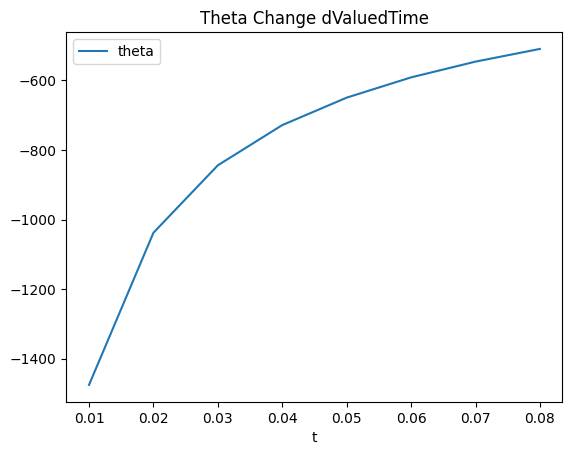

In [68]:
opt.theta_change()